## Lab 02 - Pandas and Data Visualization
This notebook will introduce you to the basics of Pandas and Data Visualization. You will learn how to load data into a Pandas DataFrame, how to perform basic data analysis, and how to visualize data. The first part of this notebook will be an interactive tutorial, and the second part will be practice exercises for you to do! **Note that the practice problems will be checked when submitted!**

#### Pandas
Pandas is a popular open-source Python library that provides data structures and data analysis tools for working with structured data. Pandas is a versatile library that simplifies data manipulation, analysis, and exploration in Python. Some of its uses:
* Tabular Data Handling
* Data Cleaning and Transformation
* Data Exploration
* Data Import/Export
* Data Visualization

#### Matplotlib
Matplotlib is a widely used for creating static, animated, and interactive visualizations. Whether you are conducting data analysis, scientific research, or data communication, Matplotlib helps you present your findings effectively and intuitively.

### Pre-requisites

In [1]:
# In case you don't have pandas, uncomment
# the following lines and run the cell

# %pip install pandas

### Overview
In this notebook, you will be learning how to use the Pandas library by working with the `cookies.csv` file. 

#### `cookies.csv` file :

The `cookies.csv` file contains information about cookies that were made in Rico's Bisquito's factory. 

The columns are the following:

`cookie`: the name of a cookie
`ingredients`: a list of the cookie's ingredients
`calories`: the number of calories the created cookie has
`radius`: the radius of the created cookie, in cm
`cost_to_make`: the cost it took to make the created cookie, in dollars

### Reading the CSV file

First, we need to import the Pandas library. We will be using the `pd` alias for the Pandas library.

In [176]:
#TODO: import pandas and matplotlib in this cell
import pandas as pd
import matplotlib.pyplot as plt

We will now look at the `cookies.csv` file. We will use the `pd.read_csv()` function to read in the CSV file. We will store the data in a variable called `cookies`.

In [177]:
#TODO: read the cookies.csv file into a pandas dataframe
df = pd.read_csv('cookies.csv')

#### Dataframe
Dataframes are a data structure that Pandas uses to store data. Dataframes are similar to tables in a database. Dataframes have rows and columns. Each row represents a single data point, and each column represents a feature of the data point.

We will then make sure we imported the data correctly by printing out the first 10 rows of the data, using the `head()` function.

In [178]:
#TODO: print the head of the dataframe
print(df.head(10))

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
4  bad berry bunny           ["flour","blueberries","sugar","butter"]   
5     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
6      minty miami          ["flour","mint extract","sugar","butter"]   
7        chocolate       ["flour","chocolate chips","sugar","butter"]   
8     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
9      minty miami          ["flour","mint extract","sugar","butter"]   

   calories  radius  cost_to_make  
0       170   3.102          0.67  
1       198   3.780          1.07  
2       224   4.069          1.04  
3       198   3.780          1.07  
4       191   4.

### Checking data types
You can check the data types of each column using the `dtypes` attribute of the DataFrame.

In [179]:
#TODO: check the data types of the columns
data_types = df.dtypes
print(data_types)

cookie           object
ingredients      object
calories          int64
radius          float64
cost_to_make    float64
dtype: object


Now, lets use use `info()` function to get more information about the Dataframe

In [180]:
# TODO: use info() to get information about datatypes and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cookie        129 non-null    object 
 1   ingredients   129 non-null    object 
 2   calories      129 non-null    int64  
 3   radius        129 non-null    float64
 4   cost_to_make  114 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 5.2+ KB


### Cleaning the data
Now that we have the data, we need to clean it. For example, some `cost_to_make` fields of some created cookies are missing. To resolve this, we can do many things: we can replace the missing data with the mean of the column, or we can get rid of the row entirely if the `cost_to_make` field is not set. 

In [181]:
#TODO: clean the dataframe and 
# print the head again to make sure 
# the changes took effect
mean_cost_to_make = df['cost_to_make'].mean()
df.loc[df['cost_to_make'].isnull(), 'cost_to_make'] = mean_cost_to_make
print(df.head(10))

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
4  bad berry bunny           ["flour","blueberries","sugar","butter"]   
5     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
6      minty miami          ["flour","mint extract","sugar","butter"]   
7        chocolate       ["flour","chocolate chips","sugar","butter"]   
8     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
9      minty miami          ["flour","mint extract","sugar","butter"]   

   calories  radius  cost_to_make  
0       170   3.102      0.670000  
1       198   3.780      1.070000  
2       224   4.069      1.040000  
3       198   3.780      1.070000  
4       191   4.

To also make sure we removed null values, we can check the number of null values in each column using the `isnull()` function.

In [182]:
#TODO: use the isnull method to make sure your data is clean
null_counts = df.isnull().sum()
print(null_counts)

cookie          0
ingredients     0
calories        0
radius          0
cost_to_make    0
dtype: int64


Next, lets check for duplicate rows using the `duplicated()` function. Then, remove those rows using `drop_duplicates()` function.

In [183]:
# TODO: check for duplicate rows
# then delete those rows form df
duplicates = df.duplicated()
df = df.drop_duplicates().reset_index(drop=True)
print(df.head(10))

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3  bad berry bunny           ["flour","blueberries","sugar","butter"]   
4     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
5      minty miami          ["flour","mint extract","sugar","butter"]   
6        chocolate       ["flour","chocolate chips","sugar","butter"]   
7     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
8      minty miami          ["flour","mint extract","sugar","butter"]   
9         nevadito  ["flour","chocolate chips","milk","vanilla ext...   

   calories  radius  cost_to_make  
0       170   3.102      0.670000  
1       198   3.780      1.070000  
2       224   4.069      1.040000  
3       191   4.148      1.390000  
4       162   3.

### Parsing the data
Now that we have the data, we could parse it to get the information we want. For example, we can check what types of cookies were made by using the `unique()` function on the `cookie` column.

In [184]:
#TODO: see what cookies are in the dataset
cookie_types = df['cookie'].unique()
print(cookie_types)

['laddoo lemon' 'red velvet rauw' 'nevadito' 'bad berry bunny'
 'orange ozuna' 'minty miami' 'chocolate']


We can also check the number of cookies made by using the `value_counts()` function on the `cookie` column.

In [185]:
#TODO: use value_counts() to see how many 
# cookies of each type there are
cookie_counts = df['cookie'].value_counts()
print(cookie_counts)

red velvet rauw    18
laddoo lemon       17
nevadito           17
bad berry bunny    17
orange ozuna       17
minty miami        17
chocolate          15
Name: cookie, dtype: int64


Or maybe we don't like how long the names of the cookies are, so we can shorten them by using the `replace()` function on the `cookie` column.

For example, let's try changing `"bad berry bunny"` to `"bbb"`.

In [186]:
#TODO: change bad berry bunny data elements to "bbb"
df['cookie'] = df['cookie'].replace('bad berry bunny', 'bbb')
print(df.head(10))

            cookie                                        ingredients  \
0     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
1  red velvet rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3              bbb           ["flour","blueberries","sugar","butter"]   
4     orange ozuna   ["flour","orange juice","sugar","vegetable oil"]   
5      minty miami          ["flour","mint extract","sugar","butter"]   
6        chocolate       ["flour","chocolate chips","sugar","butter"]   
7     laddoo lemon             ["flour","lemon juice","sugar","ghee"]   
8      minty miami          ["flour","mint extract","sugar","butter"]   
9         nevadito  ["flour","chocolate chips","milk","vanilla ext...   

   calories  radius  cost_to_make  
0       170   3.102      0.670000  
1       198   3.780      1.070000  
2       224   4.069      1.040000  
3       191   4.148      1.390000  
4       162   3.

We may even like the original names better, but we may want to get rid of the spaces. For example, we can change `"orange ozuna"` to `"orange_ozuna"`. Here, we will use the `str.replace()` function.

In [187]:
#TODO: adjust orange ozuna as described
df['cookie'] = df['cookie'].str.replace(' ', '_')
print(df.head(10))

            cookie                                        ingredients  \
0     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
1  red_velvet_rauw  ["flour","cocoa powder","butter","red food col...   
2         nevadito  ["flour","chocolate chips","milk","vanilla ext...   
3              bbb           ["flour","blueberries","sugar","butter"]   
4     orange_ozuna   ["flour","orange juice","sugar","vegetable oil"]   
5      minty_miami          ["flour","mint extract","sugar","butter"]   
6        chocolate       ["flour","chocolate chips","sugar","butter"]   
7     laddoo_lemon             ["flour","lemon juice","sugar","ghee"]   
8      minty_miami          ["flour","mint extract","sugar","butter"]   
9         nevadito  ["flour","chocolate chips","milk","vanilla ext...   

   calories  radius  cost_to_make  
0       170   3.102      0.670000  
1       198   3.780      1.070000  
2       224   4.069      1.040000  
3       191   4.148      1.390000  
4       162   3.

We may even just want to keep the first word of the cookie name. For example, we can change `"orange_ozuna"` to `"orange"`.

In [188]:
#TODO: adjust all cookies so only the first word
# is used as the cookie name
df['cookie'] = df['cookie'].str.split('_').str[0]
print(df.head(10))

      cookie                                        ingredients  calories  \
0     laddoo             ["flour","lemon juice","sugar","ghee"]       170   
1        red  ["flour","cocoa powder","butter","red food col...       198   
2   nevadito  ["flour","chocolate chips","milk","vanilla ext...       224   
3        bbb           ["flour","blueberries","sugar","butter"]       191   
4     orange   ["flour","orange juice","sugar","vegetable oil"]       162   
5      minty          ["flour","mint extract","sugar","butter"]       204   
6  chocolate       ["flour","chocolate chips","sugar","butter"]       243   
7     laddoo             ["flour","lemon juice","sugar","ghee"]       178   
8      minty          ["flour","mint extract","sugar","butter"]       184   
9   nevadito  ["flour","chocolate chips","milk","vanilla ext...       216   

   radius  cost_to_make  
0   3.102      0.670000  
1   3.780      1.070000  
2   4.069      1.040000  
3   4.148      1.390000  
4   3.241      1.15000

Another thing that may come to mind is that maybe getting flour could cost more money due to inflation, so we have to adjust our `cost_to_make` values. We can do this by using the `apply()` function on the `cost_to_make` column.

In [189]:
#Don't edit this method
def adjust_cost(cost):
    return cost + 0.5

#TODO: use apply() to adjust the cost_to_make column.
df['cost_to_make'] = df['cost_to_make'].apply(adjust_cost)
print(df.head(10))

      cookie                                        ingredients  calories  \
0     laddoo             ["flour","lemon juice","sugar","ghee"]       170   
1        red  ["flour","cocoa powder","butter","red food col...       198   
2   nevadito  ["flour","chocolate chips","milk","vanilla ext...       224   
3        bbb           ["flour","blueberries","sugar","butter"]       191   
4     orange   ["flour","orange juice","sugar","vegetable oil"]       162   
5      minty          ["flour","mint extract","sugar","butter"]       204   
6  chocolate       ["flour","chocolate chips","sugar","butter"]       243   
7     laddoo             ["flour","lemon juice","sugar","ghee"]       178   
8      minty          ["flour","mint extract","sugar","butter"]       184   
9   nevadito  ["flour","chocolate chips","milk","vanilla ext...       216   

   radius  cost_to_make  
0   3.102      1.170000  
1   3.780      1.570000  
2   4.069      1.540000  
3   4.148      1.890000  
4   3.241      1.65000

And we can do a lot more things! We will see these concepts be used in the next homework assignment, along with a couple new ones to show you how powerful Pandas is.

### More complicated operations: Grouping, Filtering, Aggregating

Before trying out these complicated operations, lets first sort the sort the df by the radius of the cookies using the `sort_values()` function.

In [190]:
# TODO: sort the df using sort_values(by='Column', ascending=False)
df = df.sort_values(by='radius', ascending=False)
print(df.head(10))

        cookie                                        ingredients  calories  \
103        red  ["flour","cocoa powder","butter","red food col...       198   
24         red  ["flour","cocoa powder","butter","red food col...       204   
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
53      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
42      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
94      laddoo             ["flour","lemon juice","sugar","ghee"]       178   
90         red  ["flour","cocoa powder","butter","red food col...       191   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
65         red  ["flour","cocoa powder","butter","red food col...       196   

     radius  cost_to_make  
103   4.930      1.550000  
24    4.667      1.900000  
102   4.619      1.676579  
53    4.573      1

We may also want to group data by certain attributes. This can be done by using `groupby()`. This method takes in a column name, and groups the data by the values in that column. For example, we can group the data by the `cookie` column.

In [191]:
#TODO: group by cookie type
grouped = df.groupby('cookie')
for cookie, group_data in grouped:
    print(f"Cookie Type: {cookie}")
    print(group_data.head(10))
    print("\n")

Cookie Type: bbb
    cookie                               ingredients  calories  radius  \
117    bbb  ["flour","blueberries","sugar","butter"]       199   4.281   
31     bbb  ["flour","blueberries","sugar","butter"]       182   4.166   
3      bbb  ["flour","blueberries","sugar","butter"]       191   4.148   
84     bbb  ["flour","blueberries","sugar","butter"]       186   4.089   
104    bbb  ["flour","blueberries","sugar","butter"]       171   4.045   
38     bbb  ["flour","blueberries","sugar","butter"]       213   4.007   
77     bbb  ["flour","blueberries","sugar","butter"]       185   3.992   
91     bbb  ["flour","blueberries","sugar","butter"]       208   3.976   
45     bbb  ["flour","blueberries","sugar","butter"]       184   3.974   
111    bbb  ["flour","blueberries","sugar","butter"]       177   3.950   

     cost_to_make  
117          1.86  
31           1.61  
3            1.89  
84           1.23  
104          1.43  
38           1.84  
77           1.59  
91      

We can also group by multiple columns. For example, we can group the data by the `cookie` and `ingredients` columns.

In [192]:
#TODO: group by cookie type and ingredients
grouped = df.groupby(['cookie', 'ingredients'])
for (cookie, ingredients), group_data in grouped:
    print(f"Cookie Type: {cookie}")
    print(f"Ingredients: {ingredients}")
    print(group_data.head(10))
    print("\n")

Cookie Type: bbb
Ingredients: ["flour","blueberries","sugar","butter"]
    cookie                               ingredients  calories  radius  \
117    bbb  ["flour","blueberries","sugar","butter"]       199   4.281   
31     bbb  ["flour","blueberries","sugar","butter"]       182   4.166   
3      bbb  ["flour","blueberries","sugar","butter"]       191   4.148   
84     bbb  ["flour","blueberries","sugar","butter"]       186   4.089   
104    bbb  ["flour","blueberries","sugar","butter"]       171   4.045   
38     bbb  ["flour","blueberries","sugar","butter"]       213   4.007   
77     bbb  ["flour","blueberries","sugar","butter"]       185   3.992   
91     bbb  ["flour","blueberries","sugar","butter"]       208   3.976   
45     bbb  ["flour","blueberries","sugar","butter"]       184   3.974   
111    bbb  ["flour","blueberries","sugar","butter"]       177   3.950   

     cost_to_make  
117          1.86  
31           1.61  
3            1.89  
84           1.23  
104          1

We may also want to filter the data. For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm. We can do this by indexing the DataFrame with a boolean expression.

In [193]:
#TODO: filter using the boolean expression
filtered_df = df[df['radius'] > 4.3]
print(filtered_df.head)

<bound method NDFrame.head of         cookie                                        ingredients  calories  \
103        red  ["flour","cocoa powder","butter","red food col...       198   
24         red  ["flour","cocoa powder","butter","red food col...       204   
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
53      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
42      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
94      laddoo             ["flour","lemon juice","sugar","ghee"]       178   
90         red  ["flour","cocoa powder","butter","red food col...       191   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
65         red  ["flour","cocoa powder","butter","red food col...       196   
81      laddoo             ["flour","lemon juice","sugar","ghee"]       167   
40       minty        

We may even want to use `groupby()` and filter idea together! For example, we can filter the data to only show the cookies that have a radius greater than 4.3 cm, and group the data by the `cookie` column.

In [194]:
#TODO: filter the data using the boolean expression
# then group by cookie column
filtered_df = df[df['radius'] > 4.3]
grouped_df = filtered_df.groupby('cookie')
for cookie, group_data in grouped_df:
    print(f"Cookie Type: {cookie}")
    print(group_data.head(10))
    print("\n")

Cookie Type: chocolate
       cookie                                   ingredients  calories  radius  \
80  chocolate  ["flour","chocolate chips","sugar","butter"]       199   4.474   
73  chocolate  ["flour","chocolate chips","sugar","butter"]       197   4.461   
55  chocolate  ["flour","chocolate chips","sugar","butter"]       206   4.328   

    cost_to_make  
80          1.64  
73          2.17  
55          1.84  


Cookie Type: laddoo
    cookie                             ingredients  calories  radius  \
42  laddoo  ["flour","lemon juice","sugar","ghee"]       195   4.562   
94  laddoo  ["flour","lemon juice","sugar","ghee"]       178   4.519   
81  laddoo  ["flour","lemon juice","sugar","ghee"]       167   4.401   

    cost_to_make  
42          1.12  
94          1.91  
81          1.74  


Cookie Type: minty
   cookie                                ingredients  calories  radius  \
40  minty  ["flour","mint extract","sugar","butter"]       174   4.388   
93  minty  ["flour",

We may also want to aggregate the data. For example, we can aggregate the data by looking at the ratio of calories to radius. We can do this by using indexing and the `apply()` function.

In [195]:
#TODO: add a column to the dataframe that is the
# calories per radius
df['calories_per_radius'] = df.apply(lambda row: row['calories'] / row['radius'], axis=1)
print(df.head(10))

        cookie                                        ingredients  calories  \
103        red  ["flour","cocoa powder","butter","red food col...       198   
24         red  ["flour","cocoa powder","butter","red food col...       204   
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
53      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
42      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
94      laddoo             ["flour","lemon juice","sugar","ghee"]       178   
90         red  ["flour","cocoa powder","butter","red food col...       191   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
65         red  ["flour","cocoa powder","butter","red food col...       196   

     radius  cost_to_make  calories_per_radius  
103   4.930      1.550000            40.162272  
24    4.667      1.900000       

Or we can just get rid of this column if we find it useless. We can do this by using the `drop()` function or indexing.

In [196]:
#TODO: drop the created column
df = df.drop('calories_per_radius', axis=1)
print(df.head(10))

        cookie                                        ingredients  calories  \
103        red  ["flour","cocoa powder","butter","red food col...       198   
24         red  ["flour","cocoa powder","butter","red food col...       204   
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
53      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
42      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
94      laddoo             ["flour","lemon juice","sugar","ghee"]       178   
90         red  ["flour","cocoa powder","butter","red food col...       191   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
65         red  ["flour","cocoa powder","butter","red food col...       196   

     radius  cost_to_make  
103   4.930      1.550000  
24    4.667      1.900000  
102   4.619      1.676579  
53    4.573      1

### Visualizing the data

We can also visualize the data. For example, we can visualize the data by plotting the radius of the cookies against the cost to make the cookies. We can do this by using the `plot()` function.

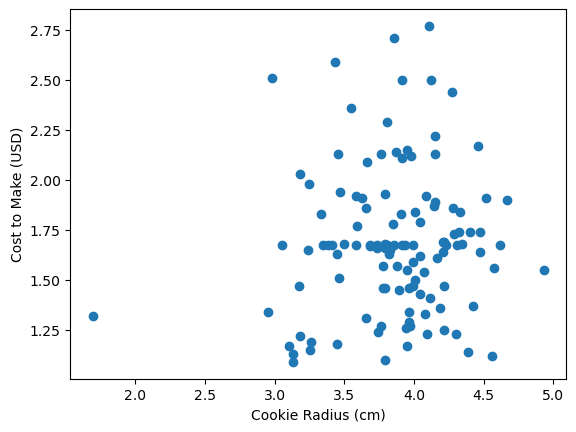

In [197]:
#TODO: plot the radius (x) versus cost to make (y)

plt.scatter(df['radius'], df['cost_to_make'])

plt.xlabel('Cookie Radius (cm)')
plt.ylabel('Cost to Make (USD)')

plt.show()


We may even want to get more specific and visualize the shape of a distribution of the `laddoo lemon`'s radius by making a boxplot. We can also do this by using the `plot()` function.

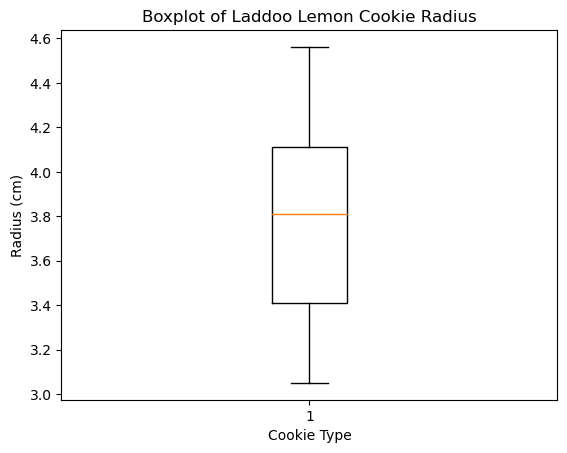

In [199]:
#TODO: add the described boxplot
# remember that you changed the name from laddoo lemon to laddoo
laddoo_df = df[df['cookie'] == 'laddoo']

plt.boxplot(laddoo_df['radius'])

plt.title('Boxplot of Laddoo Lemon Cookie Radius')
plt.xlabel('Cookie Type')
plt.ylabel('Radius (cm)')

plt.show()

Alternatively, we can create a histogram to visualize the distribution of the `laddoo lemon`'s radius. We can also do this by using the `plot()` function.

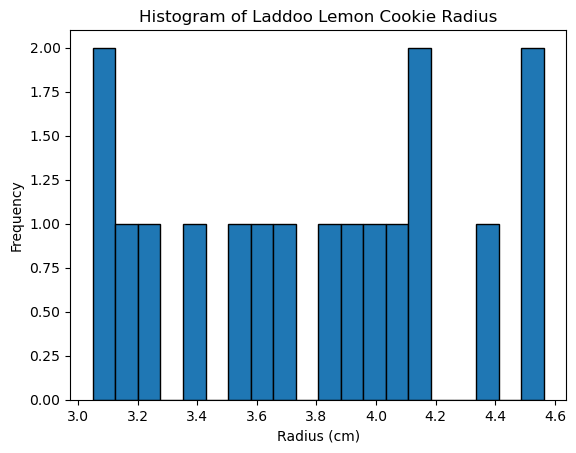

In [201]:
#TODO: add the described histogram
# Filter the DataFrame for 'laddoo lemon' cookies
laddoo_lemon_df = df[df['cookie'] == 'laddoo']

# Create a histogram for the 'radius' of 'laddoo lemon' cookies
plt.hist(laddoo_lemon_df['radius'], bins=20, edgecolor='black')

# Set the title and labels
plt.title('Histogram of Laddoo Lemon Cookie Radius')
plt.xlabel('Radius (cm)')
plt.ylabel('Frequency')

# Show the plot
plt.show()


Things can get more complicated too. Maybe we want to analyze the behaviors of `bad berry bunny` and `laddoo lemon`'s radius using a boxplot. But this time, let's try it using the alternative `boxplot()` function. For practice, try doing it with `plot()` too!

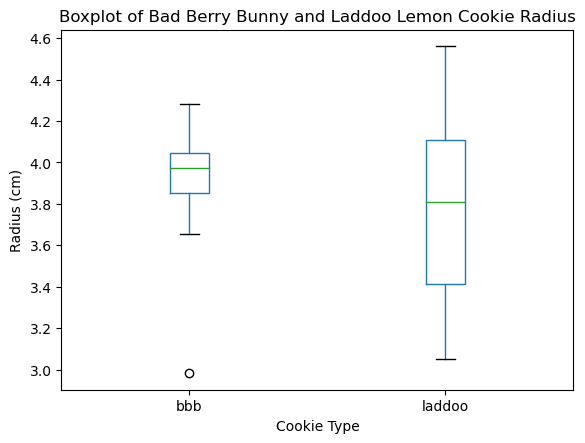

'"# Filter the DataFrame for \'bad berry bunny\' and \'laddoo lemon\' cookies\nselected_cookies_df = df[df[\'cookie\'].isin([\'bbb\', \'laddoo\'])]\n\n# Create a boxplot for the selected cookies\' \'radius\'\nselected_cookies_df.groupby(\'cookie\')[\'radius\'].plot(kind=\'box\', vert=False, figsize=(8, 6))\n\n# Set the title and labels\nplt.title(\'Boxplot of Bad Berry Bunny and Laddoo Lemon Cookie Radius\')\nplt.xlabel(\'Radius (cm)\')\n\n# Show the plot\nplt.show()'

In [206]:
#TODO: analyze the two cookie's radius in a boxplot
# Filter the DataFrame for 'bad berry bunny' and 'laddoo lemon' cookies
selected_cookies_df = df[df['cookie'].isin(['bbb', 'laddoo'])]

# Create a boxplot for the selected cookies' 'radius'
selected_cookies_df.boxplot(column='radius', by='cookie', grid=False)

# Set the title and labels
plt.title('Boxplot of Bad Berry Bunny and Laddoo Lemon Cookie Radius')
plt.suptitle('')  # Remove the default title
plt.xlabel('Cookie Type')
plt.ylabel('Radius (cm)')

# Show the plot
plt.show()

""""# Filter the DataFrame for 'bad berry bunny' and 'laddoo lemon' cookies
selected_cookies_df = df[df['cookie'].isin(['bbb', 'laddoo'])]

# Create a boxplot for the selected cookies' 'radius'
selected_cookies_df.groupby('cookie')['radius'].plot(kind='box', vert=False, figsize=(8, 6))

# Set the title and labels
plt.title('Boxplot of Bad Berry Bunny and Laddoo Lemon Cookie Radius')
plt.xlabel('Radius (cm)')

# Show the plot
plt.show()"""



### Practice Problems
Now that you have learned some of Pandas' capabilities, let's try some practice problems! **This is the part that will be checked when you submit it!**

#### Problem 1
How many cookies were made? (Hint: use the `shape` attribute)

In [207]:
#Add your code here
num_cookies = df.shape[0]

print(f"Number of cookies made: {num_cookies}")

Number of cookies made: 118


#### Problem 2
Add a column to the DataFrame that has the value `True` if the cookie has a radius greater than 4 cm, and `False` otherwise. (Hint: use the `apply()` function)

In [210]:
#Add your code here

def check_radius(radius):
    return radius > 4


df['radius_greater_than_4cm'] = df['radius'].apply(check_radius)

print(df.head(50))


        cookie                                        ingredients  calories  \
103        red  ["flour","cocoa powder","butter","red food col...       198   
24         red  ["flour","cocoa powder","butter","red food col...       204   
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
53      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
42      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
94      laddoo             ["flour","lemon juice","sugar","ghee"]       178   
90         red  ["flour","cocoa powder","butter","red food col...       191   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
65         red  ["flour","cocoa powder","butter","red food col...       196   
81      laddoo             ["flour","lemon juice","sugar","ghee"]       167   
40       minty          ["flour","mint extract","sug

#### Problem 3

Group the data by the `cookie` column, and find the average radius of each cookie. (Hint: use the `groupby()` and `transform()` function). Add this column to the DataFrame.

In [211]:
#Add your code here

df['average_radius'] = df.groupby('cookie')['radius'].transform('mean')

print(df.head(10))


        cookie                                        ingredients  calories  \
103        red  ["flour","cocoa powder","butter","red food col...       198   
24         red  ["flour","cocoa powder","butter","red food col...       204   
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
53      orange   ["flour","orange juice","sugar","vegetable oil"]       186   
42      laddoo             ["flour","lemon juice","sugar","ghee"]       195   
94      laddoo             ["flour","lemon juice","sugar","ghee"]       178   
90         red  ["flour","cocoa powder","butter","red food col...       191   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
65         red  ["flour","cocoa powder","butter","red food col...       196   

     radius  cost_to_make  radius_greater_than_4cm  average_radius  
103   4.930      1.550000                     True        4.0

#### Problem 4
Create a new DataFrame that only contains the cookies that have the ingredient `"chocolate chips"`. (Hint: use the `str.contains()` function)

In [212]:
#Add your code here
chocolate_chip_cookies = df[df['ingredients'].str.contains("chocolate chips")]

print(chocolate_chip_cookies.head(10))


        cookie                                        ingredients  calories  \
102   nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   
80   chocolate       ["flour","chocolate chips","sugar","butter"]       199   
73   chocolate       ["flour","chocolate chips","sugar","butter"]       197   
23    nevadito  ["flour","chocolate chips","milk","vanilla ext...       219   
55   chocolate       ["flour","chocolate chips","sugar","butter"]       206   
109   nevadito  ["flour","chocolate chips","milk","vanilla ext...       216   
48   chocolate       ["flour","chocolate chips","sugar","butter"]       229   
41   chocolate       ["flour","chocolate chips","sugar","butter"]       240   
87   chocolate       ["flour","chocolate chips","sugar","butter"]       243   
57    nevadito  ["flour","chocolate chips","milk","vanilla ext...       211   

     radius  cost_to_make  radius_greater_than_4cm  average_radius  
102   4.619      1.676579                     True        4.0

#### Problem 5

Create a boxplot of `cost_to_make` for all cookies except `chocolate` using the `boxplot()` function.

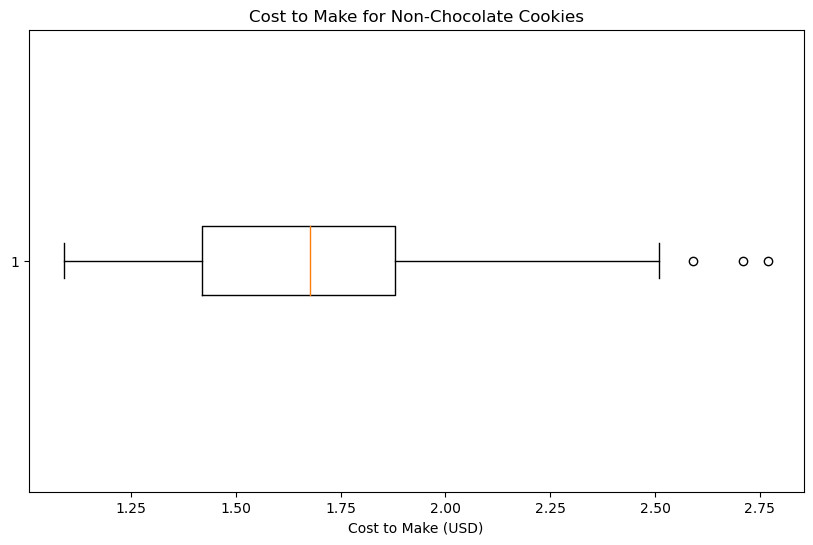

In [213]:
#Add your code here
non_chocolate_cookies = df[df['cookie'] != 'chocolate']

plt.figure(figsize=(10, 6))  
plt.boxplot(non_chocolate_cookies['cost_to_make'], vert=False)  
plt.title('Cost to Make for Non-Chocolate Cookies')  
plt.xlabel('Cost to Make (USD)')
plt.show()  

#### Problem 6

Create a histogram of the `bad berry bunny`'s calories using the `plot()` function.

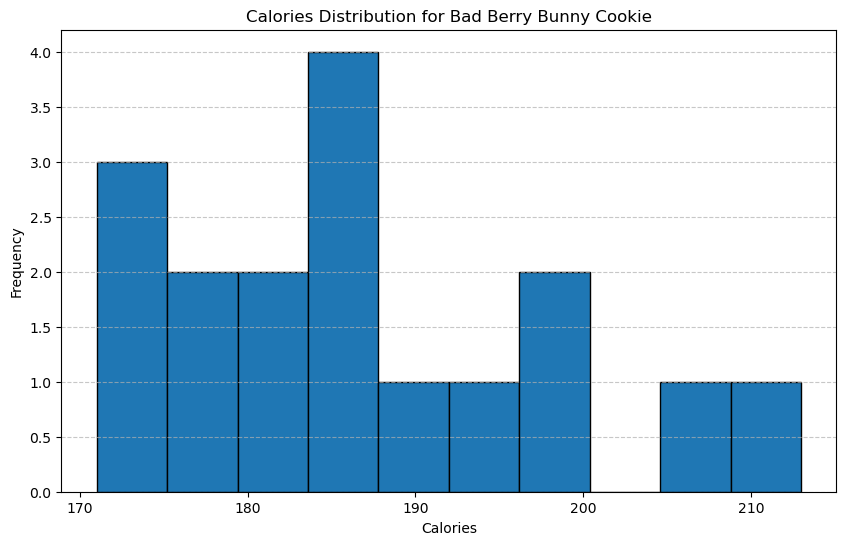

In [214]:
#Add your code here
bad_berry_bunny_calories = df[df['cookie'] == 'bbb']['calories']

plt.figure(figsize=(10, 6))  
plt.hist(bad_berry_bunny_calories, bins=10, edgecolor='k')  
plt.title('Calories Distribution for Bad Berry Bunny Cookie')  
plt.xlabel('Calories')  
plt.ylabel('Frequency') 
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show() 

#### Problem 7

Calculate the average calories per cookie type and display the result in a bar chart.

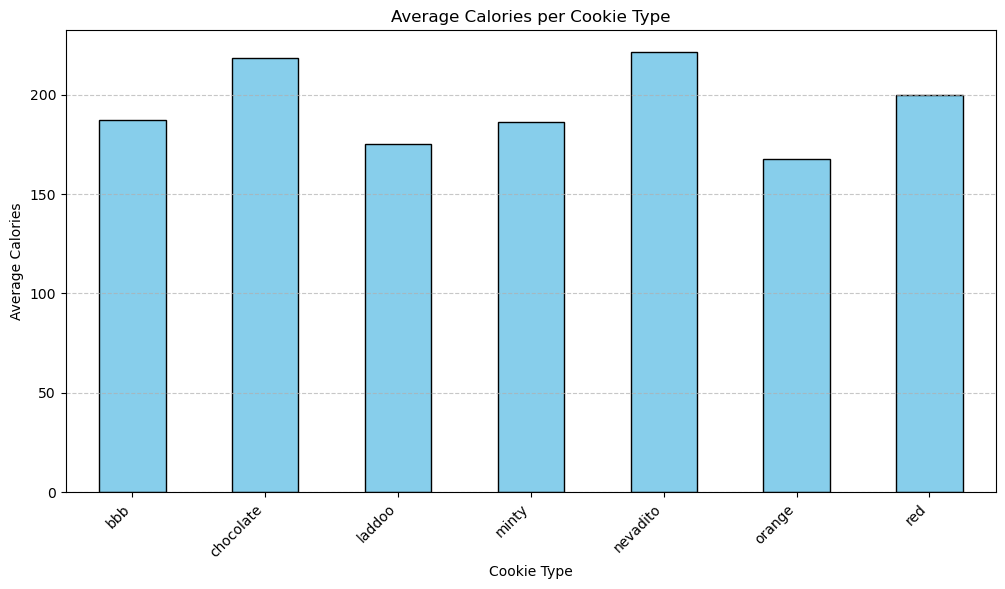

In [215]:
#Add your code here
average_calories_per_cookie = df.groupby('cookie')['calories'].mean()


plt.figure(figsize=(12, 6))  
average_calories_per_cookie.plot(kind='bar', color='skyblue', edgecolor='k')  
plt.title('Average Calories per Cookie Type')  
plt.xlabel('Cookie Type')  
plt.ylabel('Average Calories')  
plt.xticks(rotation=45, ha='right')  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()  

#### Problem 8

Find the top 3 most expensive cookies in terms of cost_to_make

In [216]:
#Add your code here
top_3_expensive_cookies = df.sort_values(by='cost_to_make', ascending=False).head(3)

print(top_3_expensive_cookies)


      cookie                                        ingredients  calories  \
35    laddoo             ["flour","lemon juice","sugar","ghee"]       176   
43  nevadito  ["flour","chocolate chips","milk","vanilla ext...       220   
12    orange   ["flour","orange juice","sugar","vegetable oil"]       159   

    radius  cost_to_make  radius_greater_than_4cm  average_radius  
35   4.110          2.77                     True        3.782118  
43   3.855          2.71                    False        4.013588  
12   3.429          2.59                    False        3.519353  
